In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do arquivo CSV
df = pd.read_csv('transicao_energetica_brasil.csv')

# Configuração do estilo
sns.set(style="whitegrid")

c:\AppData\Local\Temp\ipykernel_14324\3297255382.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Tipo de Energia", y="Produção de Energia (MWh)", data=df, ax=ax, ci=None, estimator=np.mean, palette="Blues")
c:\AppData\Local\Temp\ipykernel_14324\3297255382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tipo de Energia", y="Produção de Energia (MWh)", data=df, ax=ax, ci=None, estimator=np.mean, palette="Blues")


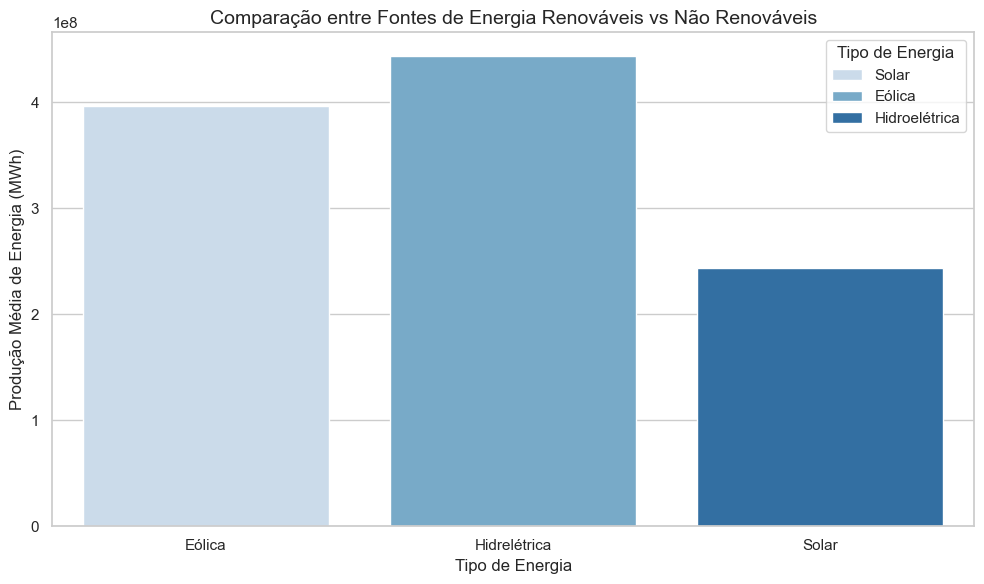

In [2]:
# Gráfico 1: Comparação entre fontes de energia (renováveis vs não renováveis)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x="Tipo de Energia", y="Produção de Energia (MWh)", data=df, ax=ax, ci=None, estimator=np.mean, palette="Blues")
ax.set_title('Comparação entre Fontes de Energia Renováveis vs Não Renováveis', fontsize=14)
ax.set_ylabel('Produção Média de Energia (MWh)', fontsize=12)
ax.set_xlabel('Tipo de Energia', fontsize=12)
ax.legend(title='Tipo de Energia', labels=['Solar', 'Eólica', 'Hidroelétrica'])
plt.tight_layout()

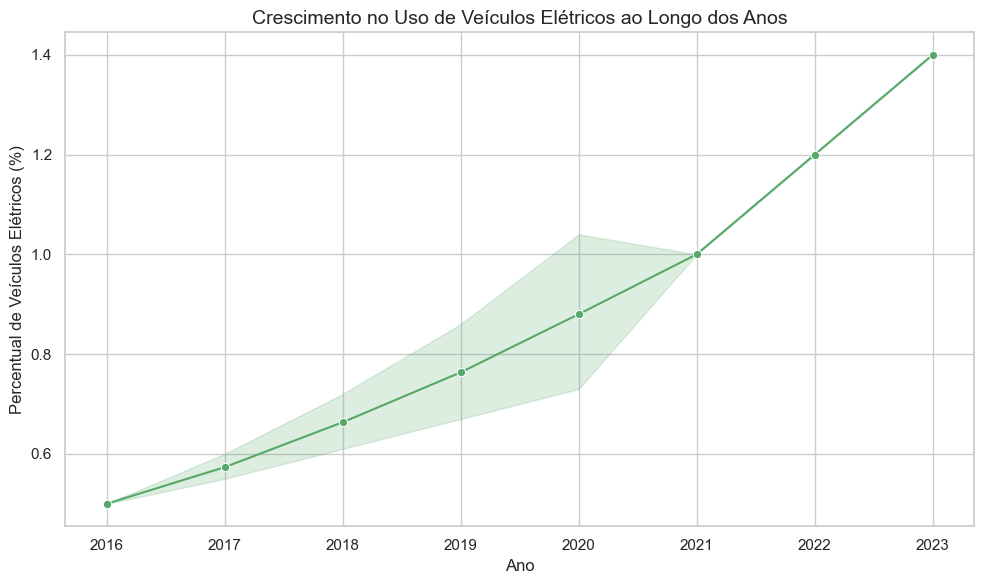

In [3]:
# Gráfico 2: Crescimento no uso de veículos elétricos ao longo dos anos
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x='Ano', y='Percentual de Veículos Elétricos (%)', data=df, marker='o', color='g')
ax.set_title('Crescimento no Uso de Veículos Elétricos ao Longo dos Anos', fontsize=14)
ax.set_ylabel('Percentual de Veículos Elétricos (%)', fontsize=12)
ax.set_xlabel('Ano', fontsize=12)
plt.tight_layout()

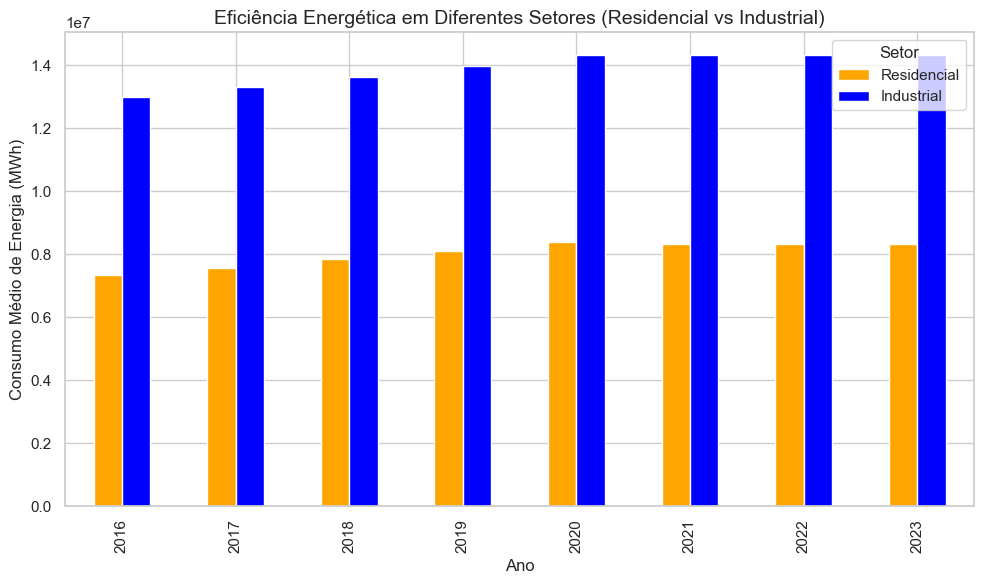

In [4]:
# Gráfico 3: Eficiência Energética em Diferentes Setores
df_setores = df[['Ano', 'Consumo Residencial (MWh)', 'Consumo Industrial (MWh)']]
df_setores = df_setores.groupby('Ano').mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_setores.plot(x='Ano', kind='bar', stacked=False, ax=ax, color=['orange', 'blue'])
ax.set_title('Eficiência Energética em Diferentes Setores (Residencial vs Industrial)', fontsize=14)
ax.set_ylabel('Consumo Médio de Energia (MWh)', fontsize=12)
ax.set_xlabel('Ano', fontsize=12)
ax.legend(title='Setor', labels=['Residencial', 'Industrial'])
plt.tight_layout()

c:\AppData\Local\Temp\ipykernel_14324\3314906584.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Program Files\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


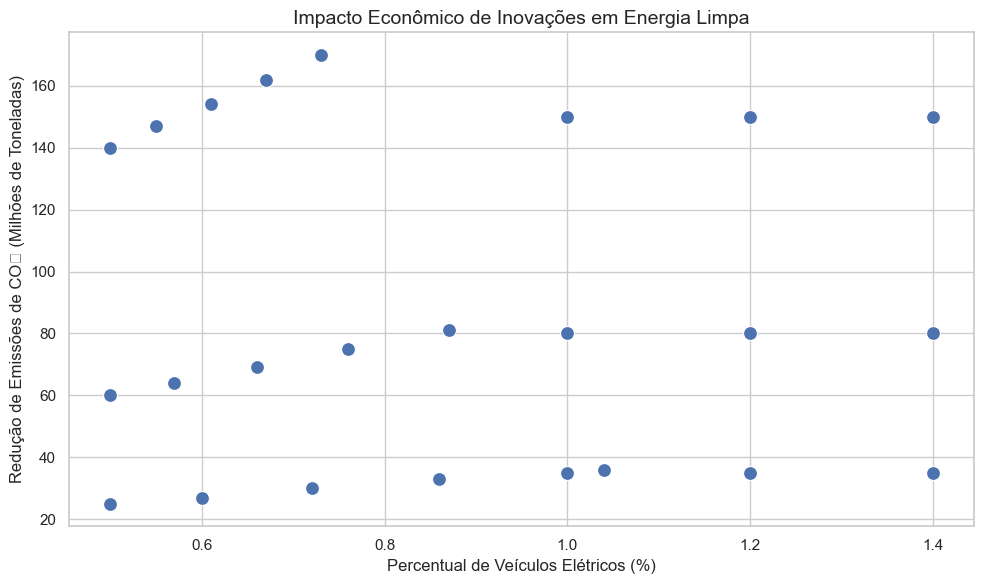

In [5]:
# Gráfico 4: Impacto Econômico de Inovações em Energia Limpa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='Percentual de Veículos Elétricos (%)', y='Redução de Emissões de CO₂ (Milhões de Toneladas)', data=df, color='b', s=100)
ax.set_title('Impacto Econômico de Inovações em Energia Limpa', fontsize=14)
ax.set_ylabel('Redução de Emissões de CO₂ (Milhões de Toneladas)', fontsize=12)
ax.set_xlabel('Percentual de Veículos Elétricos (%)', fontsize=12)
plt.tight_layout()


c:\AppData\Local\Temp\ipykernel_14324\1728346524.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Program Files\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


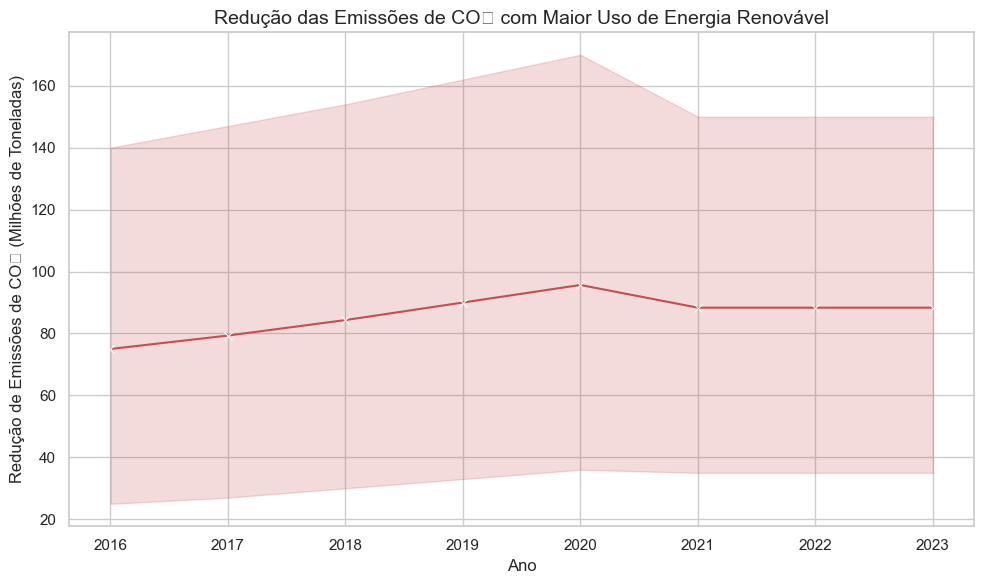

In [6]:
# Gráfico 5: Redução das Emissões de CO₂ em Áreas com Maior Uso de Energia Renovável
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x='Ano', y='Redução de Emissões de CO₂ (Milhões de Toneladas)', data=df, marker='x', color='r')
ax.set_title('Redução das Emissões de CO₂ com Maior Uso de Energia Renovável', fontsize=14)
ax.set_ylabel('Redução de Emissões de CO₂ (Milhões de Toneladas)', fontsize=12)
ax.set_xlabel('Ano', fontsize=12)
plt.tight_layout()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleção das variáveis para o modelo de regressão
def buscarDados():
   df = pd.read_csv('transicao_energetica_brasil.csv')
   X = df[["Produção de Energia (MWh)", "Consumo Residencial (MWh)", 
          "Consumo Industrial (MWh)", "Percentual de Veículos Elétricos (%)"]]
   y = df["Redução de Emissões de CO₂ (Milhões de Toneladas)"]

    # Divisão dos dados em conjuntos de treino e teste
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo de regressão
   reg_model = LinearRegression()
   reg_model.fit(X_train, y_train)

# Previsões e avaliação do modelo
   y_pred = reg_model.predict(X_test)
   mse = mean_squared_error(y_test, y_pred)
   r2 = r2_score(y_test, y_pred)

   reg_model.coef_, reg_model.intercept_, mse, r2


In [ ]:
# EPE (Empresa de Pesquisa Energética): Publicações do Plano Decenal de Expansão de Energia (PDE), que traz previsões e metas relacionadas à matriz energética brasileira.

# https://www.epe.gov.br
# Balanço Energético Nacional (BEN): Relatórios anuais elaborados pela EPE que analisam a produção e consumo de energia no Brasil, incluindo renováveis como eólica e solar.

# Balanço Energético Nacional
# IEA (International Energy Agency): Relatórios globais sobre tendências em energia renovável, eficiência energética e eletrificação de veículos.

# https://www.iea.org
# ABEEólica (Associação Brasileira de Energia Eólica) e ABSOLAR (Associação Brasileira de Energia Solar Fotovoltaica): Dados sobre o crescimento do setor e projetos no Brasil.

# https://abeeolica.org.br
# https://absolar.org.br
# REN21 Renewables Global Status Report: Relatórios anuais que analisam o crescimento das energias renováveis no mundo, incluindo indicadores relacionados a emissões e tecnologias.

# https://www.ren21.net